In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df_autoinsurance=pd.read_csv("autoinsurance.csv",parse_dates=["Effective To Date"])
df_autoinsurance.head()
#importing pandas library
#loading the data and parsing dates 

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus  ...  \
0  Bachelor        2011-02-24         Employed  ...   
1  Bachelor        2011-01-31       Unemployed  ...   
2  Bachelor        2011-02-19         Employed  ...   
3  Bachelor        2011-01-20       Unemployed  ...   
4  Bachelor        2011-02-03         Employed  ...   

  Months Since Policy Inception  Number of Open Complaints Number of Policies  \
0                             5                          0                  1   
1                            42                          0                  8   
2                            38                          0                  2   
3                            65                          0                  7   
4                            44                          0                  1   

      Policy Type        Policy  Claim Reason  Sales Channel  \
0  Corporate Auto  Corporate L3     Collision          Agent   
1   Personal Auto   Personal L3  Scratch/Dent          Agent   
2   Personal Auto   Personal L3     Collision          Agent   
3  Corporate Auto  Corporate L2     Collision    Call Center   
4   Personal Auto   Personal L1     Collision          Agent   

   Total Claim Amount  Vehicle Class Vehicle Size  
0          384.811147   Two-Door Car      Medsize  
1         1131.464935  Four-Door Car      Medsize  
2          566.472247   Two-Door Car      Medsize  
3          529.881344            SUV      Medsize  
4          138.130879  Four-Door Car      Medsize  

[5 rows x 26 columns]

In [3]:
#checking the datatypes
df_autoinsurance.dtypes

Customer                                 object
Country                                  object
State Code                               object
State                                    object
Claim Amount                            float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                  

In [4]:
#heatmap shows no missing data present in the dataset
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_autoinsurance.isnull())
plt.show()

<Figure size 640x480 with 2 Axes>

In [5]:
#creating columns and loanding the month year day and count data on the DataFrame
df_autoinsurance["month"]=df_autoinsurance["Effective To Date"].dt.month_name()
df_autoinsurance["year"]=df_autoinsurance["Effective To Date"].dt.year
df_autoinsurance["day"]=df_autoinsurance["Effective To Date"].dt.day_name()
df_autoinsurance.head()

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus  ...     Policy Type  \
0  Bachelor        2011-02-24         Employed  ...  Corporate Auto   
1  Bachelor        2011-01-31       Unemployed  ...   Personal Auto   
2  Bachelor        2011-02-19         Employed  ...   Personal Auto   
3  Bachelor        2011-01-20       Unemployed  ...  Corporate Auto   
4  Bachelor        2011-02-03         Employed  ...   Personal Auto   

         Policy  Claim Reason Sales Channel  Total Claim Amount  \
0  Corporate L3     Collision         Agent          384.811147   
1   Personal L3  Scratch/Dent         Agent         1131.464935   
2   Personal L3     Collision         Agent          566.472247   
3  Corporate L2     Collision   Call Center          529.881344   
4   Personal L1     Collision         Agent          138.130879   

   Vehicle Class  Vehicle Size     month  year       day  
0   Two-Door Car       Medsize  February  2011  Thursday  
1  Four-Door Car       Medsize   January  2011    Monday  
2   Two-Door Car       Medsize  February  2011  Saturday  
3            SUV       Medsize   January  2011  Thursday  
4  Four-Door Car       Medsize  February  2011  Thursday  

[5 rows x 29 columns]

In [6]:
#value counts of Country shows only onw country is present .i.e US
df_autoinsurance["Country"].value_counts()

US    9134
Name: Country, dtype: int64

In [7]:
df_autoinsurance.drop(["Customer","Country","State Code","Effective To Date"],inplace=True,axis=1)
#droping columns which are not necessary

In [8]:
df_autoinsurance.head()
#checking the head of the dataframe for required changes

State  Claim Amount Response  Coverage Education EmploymentStatus  \
0    Kansas    276.351928       No     Basic  Bachelor         Employed   
1  Nebraska    697.953590       No  Extended  Bachelor       Unemployed   
2  Oklahoma   1288.743165       No   Premium  Bachelor         Employed   
3  Missouri    764.586183       No     Basic  Bachelor       Unemployed   
4    Kansas    281.369258       No     Basic  Bachelor         Employed   

  Gender  Income Location Code Marital Status  ...     Policy Type  \
0      F   56274      Suburban        Married  ...  Corporate Auto   
1      F       0      Suburban         Single  ...   Personal Auto   
2      F   48767      Suburban        Married  ...   Personal Auto   
3      M       0      Suburban        Married  ...  Corporate Auto   
4      M   43836         Rural         Single  ...   Personal Auto   

         Policy  Claim Reason  Sales Channel  Total Claim Amount  \
0  Corporate L3     Collision          Agent          384.811147   
1   Personal L3  Scratch/Dent          Agent         1131.464935   
2   Personal L3     Collision          Agent          566.472247   
3  Corporate L2     Collision    Call Center          529.881344   
4   Personal L1     Collision          Agent          138.130879   

   Vehicle Class Vehicle Size     month  year       day  
0   Two-Door Car      Medsize  February  2011  Thursday  
1  Four-Door Car      Medsize   January  2011    Monday  
2   Two-Door Car      Medsize  February  2011  Saturday  
3            SUV      Medsize   January  2011  Thursday  
4  Four-Door Car      Medsize  February  2011  Thursday  

[5 rows x 25 columns]

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_autoinsurance['State']=le.fit_transform(df_autoinsurance['State'].astype(str))
df_autoinsurance['Response']=le.fit_transform(df_autoinsurance['Response'].astype(str))
df_autoinsurance['Coverage']=le.fit_transform(df_autoinsurance['Coverage'].astype(str))
df_autoinsurance['EmploymentStatus']=le.fit_transform(df_autoinsurance['EmploymentStatus'].astype(str))
df_autoinsurance['Gender']=le.fit_transform(df_autoinsurance['Gender'].astype(str))
df_autoinsurance['Location Code']=le.fit_transform(df_autoinsurance['Location Code'].astype(str))
df_autoinsurance['Policy Type']=le.fit_transform(df_autoinsurance['Policy Type'].astype(str))
df_autoinsurance['Claim Reason']=le.fit_transform(df_autoinsurance['Claim Reason'].astype(str))
df_autoinsurance['Sales Channel']=le.fit_transform(df_autoinsurance['Sales Channel'].astype(str))
df_autoinsurance['Vehicle Class']=le.fit_transform(df_autoinsurance['Vehicle Class'].astype(str))
df_autoinsurance['Vehicle Size']=le.fit_transform(df_autoinsurance['Vehicle Size'].astype(str))
df_autoinsurance['month']=le.fit_transform(df_autoinsurance['month'].astype(str))
df_autoinsurance['day']=le.fit_transform(df_autoinsurance['day'].astype(str))
df_autoinsurance['Education']=le.fit_transform(df_autoinsurance['Education'].astype(str))
df_autoinsurance['Policy']=le.fit_transform(df_autoinsurance['Policy'].astype(str))
df_autoinsurance['Marital Status']=le.fit_transform(df_autoinsurance['Marital Status'].astype(str))
df_autoinsurance.head()
#using labelEncoder converting categorical columns to numerical form


State  Claim Amount  Response  Coverage  Education  EmploymentStatus  \
0      1    276.351928         0         0          0                 1   
1      3    697.953590         0         1          0                 4   
2      4   1288.743165         0         2          0                 1   
3      2    764.586183         0         0          0                 4   
4      1    281.369258         0         0          0                 1   

   Gender  Income  Location Code  Marital Status  ...  Policy Type  Policy  \
0       0   56274              1               1  ...            0       2   
1       0       0              1               2  ...            1       5   
2       0   48767              1               1  ...            1       5   
3       1       0              1               1  ...            0       1   
4       1   43836              0               2  ...            1       3   

   Claim Reason  Sales Channel  Total Claim Amount  Vehicle Class  \
0             0              0          384.811147              5   
1             3              0         1131.464935              0   
2             0              0          566.472247              5   
3             0              2          529.881344              3   
4             0              0          138.130879              0   

   Vehicle Size  month  year  day  
0             1      0  2011    4  
1             1      1  2011    1  
2             1      0  2011    2  
3             1      1  2011    4  
4             1      0  2011    4  

[5 rows x 25 columns]

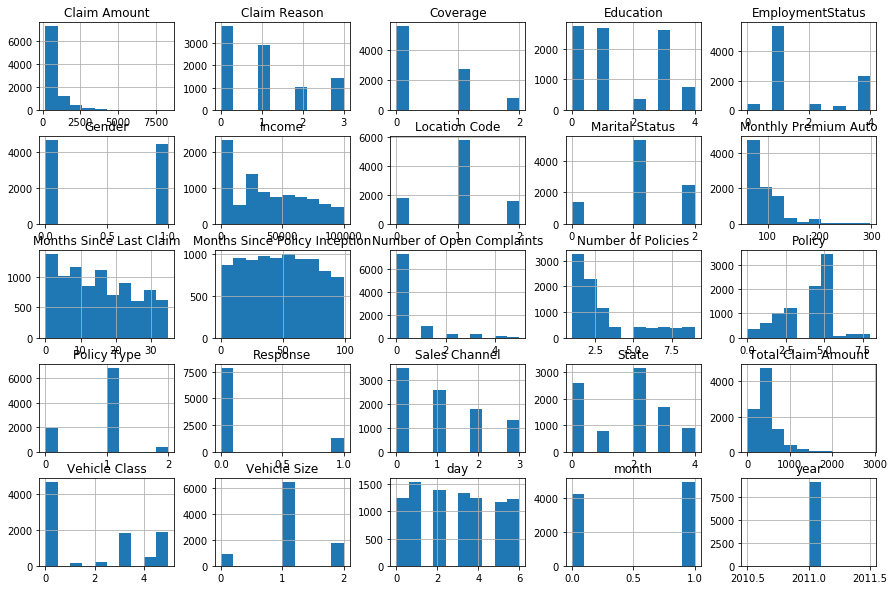

In [10]:
df_autoinsurance.hist(figsize=(15,10))
plt.show()
#histogram of all the numeric column 

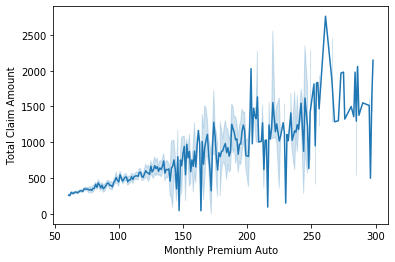

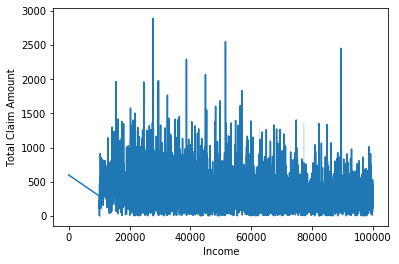

In [11]:
#lineplot of mothly premium auto vs total claim shows that with increase in mothlyly premium auto there is a incerase in total claim amount
sns.lineplot(x="Monthly Premium Auto",y="Total Claim Amount",data=df_autoinsurance)
plt.show()
#lineplot of income vs total claim amount shows that with increase in income there is a incerase in total claim amount

sns.lineplot(x="Income",y="Total Claim Amount",data=df_autoinsurance)
plt.show()


In [12]:
df_autoinsurance.shape
#checking the shape of the data

(9134, 25)

In [13]:
y=pd.DataFrame(df_autoinsurance["Total Claim Amount"])
x=df_autoinsurance.drop(columns=["Total Claim Amount"],inplace=True)
x=pd.DataFrame(df_autoinsurance.iloc[:,:25])
#dividing the data into input and output 

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
pca_new = PCA(n_components=8)
x= pca_new.fit_transform(x)
#using PCA to combine correlated column since the no. of column is 25 in the data set

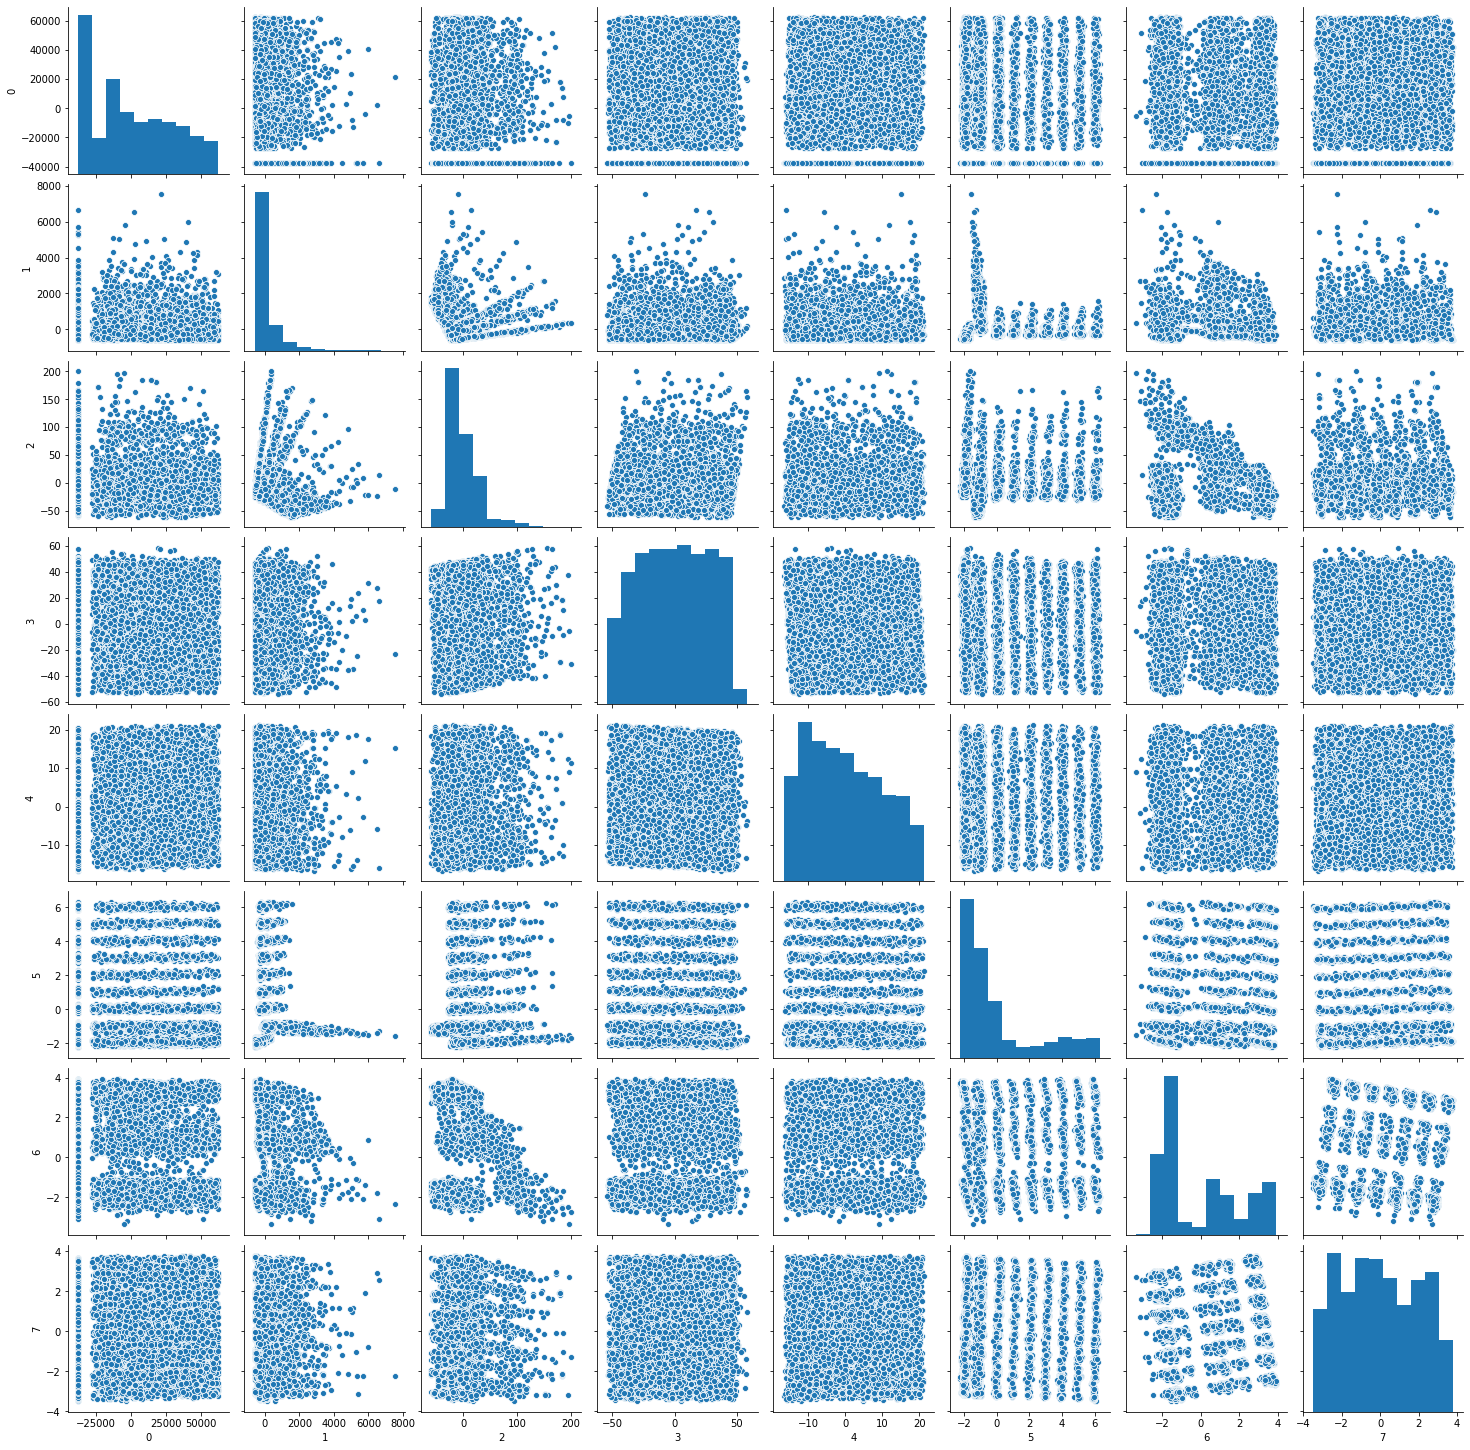

In [15]:
x=pd.DataFrame(x)
sns.pairplot(x)
#using pairplot to visualize the relation between different column after PCA


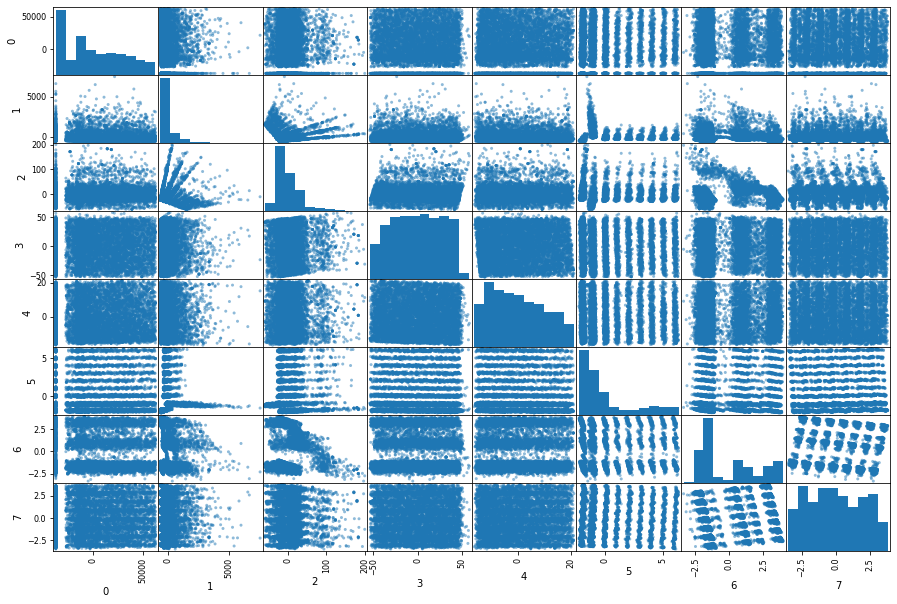

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(x,figsize=(15,10))
plt.show()
#scatter matrix of each of the column paired with other columns

In [17]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)
df_x=pd.DataFrame(x,columns=x.columns)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def maxr2_score(regr,df_x,y):
    maxr_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.20)
        regr=linear_model.LinearRegression()
        regr.fit(x_train,y_train)
        y_predict=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_predict)
        print("r2score corresponing to",r_state,"is:",r2_scr)
        if r2_scr>maxr_score:
            maxr_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score corresponding to ",final_r_state,"is",maxr_score) 
    return final_r_state
#creating a function to find the maximum r2score corresponding to the random_state

In [19]:
regr=linear_model.LinearRegression()
r_state=maxr2_score(regr,df_x,y)
#calling the function using LinearRegression

r2score corresponing to 42 is: 0.4942841819408611
r2score corresponing to 43 is: 0.48912299817929183
r2score corresponing to 44 is: 0.5105075368416321
r2score corresponing to 45 is: 0.5187404401367968
r2score corresponing to 46 is: 0.49290940143278483
r2score corresponing to 47 is: 0.5399259329530501
r2score corresponing to 48 is: 0.5583479941242878
r2score corresponing to 49 is: 0.5327159886503713
r2score corresponing to 50 is: 0.4960718152911321
r2score corresponing to 51 is: 0.5246422761439313
r2score corresponing to 52 is: 0.5355580916007039
r2score corresponing to 53 is: 0.530387928003756
r2score corresponing to 54 is: 0.5236102033073375
r2score corresponing to 55 is: 0.5504512066041256
r2score corresponing to 56 is: 0.5348885832567611
r2score corresponing to 57 is: 0.49052788759506893
r2score corresponing to 58 is: 0.5213141857627257
r2score corresponing to 59 is: 0.5043051331778763
r2score corresponing to 60 is: 0.5083071780365563
r2score corresponing to 61 is: 0.516115954987846

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(df_x,y)
gknr.best_params_
#using GridSearchCV to find the best parameters

{'n_neighbors': 19}

In [21]:
def maxr2_score(knr,df_x,y):
    maxr_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.20)
        knr=KNeighborsRegressor(n_neighbors=19)
        knr.fit(x_train,y_train)
        y_predict=knr.predict(x_test)
        r2_scr=r2_score(y_test,y_predict)
        print("r2score corresponing to",r_state,"is:",r2_scr)
        if r2_scr>maxr_score:
            maxr_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score corresponding to ",final_r_state,"is",maxr_score) 
    return final_r_state
#creating a function to find the maximum r2score corresponding to the random_state

In [22]:
knr=KNeighborsRegressor(n_neighbors=19)
r_state=maxr2_score(knr,df_x,y)
#calling the function using KNeighborsRegressor

r2score corresponing to 42 is: 0.505363442382025
r2score corresponing to 43 is: 0.4872464148554553
r2score corresponing to 44 is: 0.5053060451341629
r2score corresponing to 45 is: 0.5317276334055969
r2score corresponing to 46 is: 0.47913022681079476
r2score corresponing to 47 is: 0.5245351430693361
r2score corresponing to 48 is: 0.5471467224040976
r2score corresponing to 49 is: 0.5082166771327721
r2score corresponing to 50 is: 0.485538632962602
r2score corresponing to 51 is: 0.5143009074878245
r2score corresponing to 52 is: 0.5219578463186665
r2score corresponing to 53 is: 0.5120859922345757
r2score corresponing to 54 is: 0.541379217254127
r2score corresponing to 55 is: 0.5294437873630542
r2score corresponing to 56 is: 0.5332236366825022
r2score corresponing to 57 is: 0.4786493631254205
r2score corresponing to 58 is: 0.5243940556775131
r2score corresponing to 59 is: 0.47770305676361347
r2score corresponing to 60 is: 0.5031994422955457
r2score corresponing to 61 is: 0.5023320116042926
r

In [23]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
grid_param={"random_state":range(0,20)}
Gdt=GridSearchCV(dtr,param_grid=grid_param,scoring='r2',cv=10)
Gdt.fit(df_x,y)
Gdt.best_params_
#using GridSearchCV to find the best parameters

{'random_state': 6}

In [24]:
#creating a function to find the random_state coresponding to the maximum r2score
def maxr2_score(dtr,df_x,y):
    maxr_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.20)
        dtr=DecisionTreeRegressor(random_state=6)
        dtr.fit(x_train,y_train)
        y_predict=dtr.predict(x_test)
        r2_scr=r2_score(y_test,y_predict)
        print("r2score corresponing to",r_state,"is:",r2_scr)
        if r2_scr>maxr_score:
            maxr_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score corresponding to ",final_r_state,"is",maxr_score) 
    return final_r_state

In [25]:
dtr=DecisionTreeRegressor(random_state=6)
r_state=maxr2_score(dtr,df_x,y)

r2score corresponing to 42 is: 0.19493759463246474
r2score corresponing to 43 is: 0.14961545216782646
r2score corresponing to 44 is: 0.17012092153921188
r2score corresponing to 45 is: 0.21351040638256313
r2score corresponing to 46 is: 0.1397502860530313
r2score corresponing to 47 is: 0.22187651079661563
r2score corresponing to 48 is: 0.2066928232715719
r2score corresponing to 49 is: 0.19711355914734152
r2score corresponing to 50 is: 0.10536269970419765
r2score corresponing to 51 is: 0.2106399707694887
r2score corresponing to 52 is: 0.21822579457346902
r2score corresponing to 53 is: 0.17122443597917547
r2score corresponing to 54 is: 0.22782289686434154
r2score corresponing to 55 is: 0.18198449581266218
r2score corresponing to 56 is: 0.13594561774500613
r2score corresponing to 57 is: 0.1185359026017534
r2score corresponing to 58 is: 0.23500719320187413
r2score corresponing to 59 is: 0.13245613159898384
r2score corresponing to 60 is: 0.15262251722480547
r2score corresponing to 61 is: 0.12

In [26]:
#using GridSearchCV to find the best parameter
from sklearn.linear_model import Ridge
r_reg=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(r_reg,parameters,cv=10)
clf.fit(df_x,y)
clf.best_params_

{'alpha': 1}

In [27]:
#creating a function to find the random_state coresponding to the maximum r2score
def maxr2_score(r_reg,df_x,y):
    maxr_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.20)
        r_reg=Ridge(alpha=1)
        r_reg.fit(x_train,y_train)
        y_predict=r_reg.predict(x_test)
        r2_scr=r2_score(y_test,y_predict)
        print("r2score corresponing to",r_state,"is:",r2_scr)
        if r2_scr>maxr_score:
            maxr_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score corresponding to ",final_r_state,"is",maxr_score) 
    return final_r_state

In [28]:
r_reg=Ridge(alpha=1)
r_state=maxr2_score(r_reg,df_x,y)

r2score corresponing to 42 is: 0.4942879798910884
r2score corresponing to 43 is: 0.48912353290872645
r2score corresponing to 44 is: 0.5105113685321263
r2score corresponing to 45 is: 0.5187429025934618
r2score corresponing to 46 is: 0.49291157582387435
r2score corresponing to 47 is: 0.5399173863531281
r2score corresponing to 48 is: 0.5583433154181983
r2score corresponing to 49 is: 0.5327146608114961
r2score corresponing to 50 is: 0.49607573427691
r2score corresponing to 51 is: 0.5246398029465669
r2score corresponing to 52 is: 0.535547013199755
r2score corresponing to 53 is: 0.5303813126184281
r2score corresponing to 54 is: 0.5236099915414297
r2score corresponing to 55 is: 0.5504424418332025
r2score corresponing to 56 is: 0.5348857140870334
r2score corresponing to 57 is: 0.49053288399763273
r2score corresponing to 58 is: 0.5213108395980717
r2score corresponing to 59 is: 0.5043108686889399
r2score corresponing to 60 is: 0.5083065026258108
r2score corresponing to 61 is: 0.5161157917415127


In [29]:
#using GridSearchCV to find the best parameter
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(df_x,y)
clf.best_params_

{'alpha': 1}

In [30]:
#creating a function to find the random_state coresponding to the maximum r2score
def maxr2_score(lsreg,df_x,y):
    maxr_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.20)
        lsreg=Lasso(alpha=1)
        lsreg.fit(x_train,y_train)
        y_predict=lsreg.predict(x_test)
        r2_scr=r2_score(y_test,y_predict)
        print("r2score corresponing to",r_state,"is:",r2_scr)
        if r2_scr>maxr_score:
            maxr_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score corresponding to ",final_r_state,"is",maxr_score) 
    return final_r_state

In [31]:
lsreg=Lasso(alpha=1)
r_state=maxr2_score(lsreg,df_x,y)

r2score corresponing to 42 is: 0.4944174292720238
r2score corresponing to 43 is: 0.48940943985471674
r2score corresponing to 44 is: 0.5105397686840047
r2score corresponing to 45 is: 0.5193378751234121
r2score corresponing to 46 is: 0.49296692029079214
r2score corresponing to 47 is: 0.5394514497115117
r2score corresponing to 48 is: 0.5582795420066328
r2score corresponing to 49 is: 0.5324475887739928
r2score corresponing to 50 is: 0.4967943607825134
r2score corresponing to 51 is: 0.5245397265609619
r2score corresponing to 52 is: 0.5351780997358014
r2score corresponing to 53 is: 0.5301929283054077
r2score corresponing to 54 is: 0.5234668166958323
r2score corresponing to 55 is: 0.5498792269041932
r2score corresponing to 56 is: 0.5349321344714375
r2score corresponing to 57 is: 0.4908606920304751
r2score corresponing to 58 is: 0.5212562786184106
r2score corresponing to 59 is: 0.5047553614712951
r2score corresponing to 60 is: 0.5077903732015214
r2score corresponing to 61 is: 0.516276176285955

In [32]:
#using GridSearchCV to find the best parameter
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(df_x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [33]:
#creating a function to find the random_state coresponding to the maximum r2score
def maxr2_score(gbr,df_x,y):
    maxr_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.20)
        gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators=100)
        gbr.fit(x_train,y_train)
        y_predict=gbr.predict(x_test)
        r2_scr=r2_score(y_test,y_predict)
        print("r2score corresponing to",r_state,"is:",r2_scr)
        if r2_scr>maxr_score:
            maxr_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score corresponding to ",final_r_state,"is",maxr_score) 
    return final_r_state

In [34]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
r_state=maxr2_score(gbr,df_x,y)

r2score corresponing to 42 is: 0.5386728609951661
r2score corresponing to 43 is: 0.5372691781500201
r2score corresponing to 44 is: 0.567357415072148
r2score corresponing to 45 is: 0.5758332988959315
r2score corresponing to 46 is: 0.5285492187732299
r2score corresponing to 47 is: 0.5817865932084103
r2score corresponing to 48 is: 0.5998917716543315
r2score corresponing to 49 is: 0.5694329155124229
r2score corresponing to 50 is: 0.5236553218037365
r2score corresponing to 51 is: 0.57358118147361
r2score corresponing to 52 is: 0.5819273942032677
r2score corresponing to 53 is: 0.5764925612016201
r2score corresponing to 54 is: 0.5818365251877712
r2score corresponing to 55 is: 0.5708953382355504
r2score corresponing to 56 is: 0.5690353625804423
r2score corresponing to 57 is: 0.5225384486482161
r2score corresponing to 58 is: 0.5775507567030476
r2score corresponing to 59 is: 0.5339572528146928
r2score corresponing to 60 is: 0.5501146851940724
r2score corresponing to 61 is: 0.55521982141527
r2sco

In [35]:
#using GridSearchCV to find the best parameter
from sklearn.ensemble import AdaBoostRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[regr,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(df_x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 500}

In [36]:
#creating a function to find the random_state coresponding to the maximum r2score
def maxr2_score(ada_reg,df_x,y):
    maxr_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(df_x,y,random_state=r_state,test_size=0.20)
        ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 learning_rate= 1,
 n_estimators= 1000)
        ada_reg.fit(x_train,y_train)
        y_predict=ada_reg.predict(x_test)
        r2_scr=r2_score(y_test,y_predict)
        print("r2score corresponing to",r_state,"is:",r2_scr)
        if r2_scr>maxr_score:
            maxr_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score corresponding to ",final_r_state,"is",maxr_score) 
    return final_r_state

In [37]:
ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 learning_rate= 1,
 n_estimators= 1000)
r_state=maxr2_score(ada_reg,df_x,y)

r2score corresponing to 42 is: 0.5322952905132725
r2score corresponing to 43 is: 0.5421589078232721
r2score corresponing to 44 is: 0.5479157745508167
r2score corresponing to 45 is: 0.5605536514918332
r2score corresponing to 46 is: 0.48593815820227837
r2score corresponing to 47 is: 0.5680506393095568
r2score corresponing to 48 is: 0.5773971645101232
r2score corresponing to 49 is: 0.5587900277254847
r2score corresponing to 50 is: 0.5442509420870183
r2score corresponing to 51 is: 0.5610392172954153
r2score corresponing to 52 is: 0.5670164565932572
r2score corresponing to 53 is: 0.5377946910696536
r2score corresponing to 54 is: 0.5723174251487566
r2score corresponing to 55 is: 0.5772012403646946
r2score corresponing to 56 is: 0.5485460868727505
r2score corresponing to 57 is: 0.5217380059345815
r2score corresponing to 58 is: 0.5694460474292813
r2score corresponing to 59 is: 0.49325891308333536
r2score corresponing to 60 is: 0.5466977187939759
r2score corresponing to 61 is: 0.536846085313328

In [38]:
from sklearn.model_selection import cross_val_score
import numpy as np
regr_score_mean=cross_val_score(regr,df_x,y,cv=5,scoring="r2").mean()
regr_score_std=cross_val_score(regr,df_x,y,cv=5,scoring="r2").std()
print("mean r2 score of linearRegression :",regr_score_mean)
print("stadard deviation for r2 score of linearRegression :",regr_score_std)
knr_score_mean=cross_val_score(knr,df_x,y,cv=5,scoring="r2").mean()
knr_score_std=cross_val_score(knr,df_x,y,cv=5,scoring="r2").std()
print("mean r2 score of knr:",knr_score_mean)
print("standard deviation of r2score for knr:",knr_score_std)
dtr_score_mean=cross_val_score(dtr,df_x,y,cv=5,scoring="r2").mean()
dtr_score_std=cross_val_score(dtr,df_x,y,cv=5,scoring="r2").std()
print("mean r2 score of DecisionTreeRegression :",dtr_score_mean)
print("stadard deviation for r2 score of DecisionTreeeRegression :",dtr_score_std)
r_reg_score_mean=cross_val_score(r_reg,df_x,y,cv=5,scoring="r2").mean()
r_reg_score_std=cross_val_score(r_reg,df_x,y,cv=5,scoring="r2").std()
print("mean r2score for RidgeRegression:",r_reg_score_mean)
print("standard deviation in r2score for RidgeRegression:",r_reg_score_std)
Lsreg_score_mean=cross_val_score(lsreg,df_x,y,cv=5,scoring="r2").mean()
Lsreg_score_std=cross_val_score(lsreg,df_x,y,cv=5,scoring="r2").std()
print("mean r2score for Lasso:",Lsreg_score_mean)
print("standard deviation in r2score for lasso:",Lsreg_score_std)
gbr_score_mean=cross_val_score(gbr,df_x,y,cv=5,scoring="r2").mean()
gbr_score_std=cross_val_score(gbr,df_x,y,cv=5,scoring="r2").std()
print("mean r2score for GradientBoostRegression:",gbr_score_mean)
print("standard deviation in r2score for GradientBoostRegression:",gbr_score_std)
print("mean r2score for AdaBoostRegressor:",cross_val_score(ada_reg,df_x,y,cv=5,scoring="r2").mean())
print("standard deviationof  r2score for AdaBoostRegressor:",cross_val_score(ada_reg,df_x,y,cv=5,scoring="r2").std())

mean r2 score of linearRegression : 0.515585606673638
stadard deviation for r2 score of linearRegression : 0.02074970941019527
mean r2 score of knr: 0.5081858226817956
standard deviation of r2score for knr: 0.026967959187681915
mean r2 score of DecisionTreeRegression : 0.16093282851242968
stadard deviation for r2 score of DecisionTreeeRegression : 0.046904817849179346
mean r2score for RidgeRegression: 0.5155863732309776
standard deviation in r2score for RidgeRegression: 0.02074312254807479
mean r2score for Lasso: 0.5157320274795172
standard deviation in r2score for lasso: 0.020190791123465956
mean r2score for GradientBoostRegression: 0.5539031638237402
standard deviation in r2score for GradientBoostRegression: 0.02224118398882324
mean r2score for AdaBoostRegressor: 0.5497603542924795
standard deviationof  r2score for AdaBoostRegressor: 0.02480911213964836


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=0.20)
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [40]:
print("r2score is",r2_score(y_test,y_pred))
print("root mean squared error is",np.sqrt(mean_squared_error(y_test,y_pred)))

r2score is 0.6098567150043698
root mean squared error is 187.78457112930863


In [41]:
#save the model
from sklearn.externals import joblib
joblib.dump(gbr,"gbr_auto_insurance_data.pkl")

['gbr_auto_insurance_data.pkl']

# # as GradientBoostRegressor has a maximum r2score 0.609 and cross val score of 0.55 with random_state 90 therefore splitting the data into training and testing data using the above values and fitting the data using GradientBoostRegressor and using the Peredict function and GradientboostRegressor alogorithm to the predict the outcomes

In [42]:
df_autofraud=pd.read_csv("autofraud.csv",parse_dates=["policy_bind_date"])
#loading data from csv file 

In [43]:
df_autofraud.head()
#checking the head of the data

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-06-09           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [44]:
#checking the datatypes
df_autofraud.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                          object
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [45]:
df_autofraud.isnull().sum()
#checking if the data contains null values
#_c39 column is empty

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [46]:
df_autofraud.shape
#checking the shape of the dataset

(1000, 40)

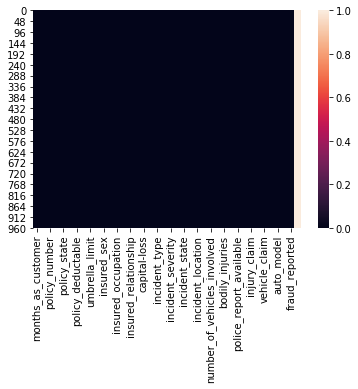

In [47]:
#heatmap shows no missing data present in the dataset
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_autofraud.isnull())
plt.show()

In [48]:
#creating a DataFrame and loading the month year day data on the DataFrame
df_autofraud["month"]=df_autofraud["policy_bind_date"].dt.month_name()
df_autofraud["year"]=df_autofraud["policy_bind_date"].dt.year
df_autofraud["day"]=df_autofraud["policy_bind_date"].dt.day_name()
df_autofraud.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-06-09           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... property_claim vehicle_claim  auto_make auto_model  \
0       466132  ...          13020         52080       Saab        92x   
1       468176  ...            780          3510   Mercedes       E400   
2       430632  ...           3850         23100      Dodge        RAM   
3       608117  ...           6340         50720  Chevrolet      Tahoe   
4       610706  ...            650          4550     Accura        RSX   

  auto_year  fraud_reported  _c39    month  year      day  
0      2004               Y   NaN  October  2014   Friday  
1      2007               Y   NaN     June  2006  Tuesday  
2      2007               N   NaN     June  2000   Friday  
3      2014               Y   NaN      May  1990   Friday  
4      2009               N   NaN     June  2014   Friday  

[5 rows x 43 columns]

In [49]:
df_autofraud.describe()
#mean policy deductable is comparable to the policy_annual_premium
#generally two vehicles are involved when a policy claim arise
#vehicle claim is much higher the property claim and injury claim

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39         year  
count     1000.000000    1000.000000  1000.000000   0.0  1000.000000  
mean      7399.570000   37928.950000  2005.103000   NaN  2001.604000  
std       4824.726179   18886.252893     6.015861   NaN     7.360391  
min          0.000000      70.000000  1995.000000   NaN  1990.000000  
25%       4445.000000   30292.500000  2000.000000   NaN  1995.000000  
50%       6750.000000   42100.000000  2005.000000   NaN  2002.000000  
75%      10885.000000   50822.500000  2010.000000   NaN  2008.000000  
max      23670.000000   79560.000000  2015.000000   NaN  2015.000000

In [50]:
df_autofraud.corr()
#correlation matrix of the column present in the dataset

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   
_c39                                        NaN       NaN            NaN   
year                                  -0.048276 -0.037444      -0.040099   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   
_c39                                       NaN                    NaN   
year                                 -0.049598               0.001249   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643  

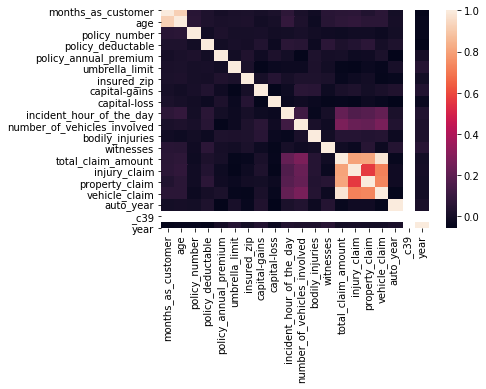

In [51]:
sns.heatmap(df_autofraud.corr())
#most of the column are not correlated

In [52]:
df_autofraud.drop(["policy_number","policy_bind_date","insured_zip","_c39","incident_date"],axis=1,inplace=True)
#dropping the columns which are not necessary 

In [53]:
df_autofraud.head()
#head of the data

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   
2                 134   29           OH    100/300               2000   
3                 256   41           IL    250/500               2000   
4                 228   44           IL   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation  ... injury_claim property_claim  vehicle_claim  \
0       craft-repair  ...         6510          13020          52080   
1  machine-op-inspct  ...          780            780           3510   
2              sales  ...         7700           3850          23100   
3       armed-forces  ...         6340           6340          50720   
4              sales  ...         1300            650           4550   

   auto_make auto_model auto_year fraud_reported    month  year      day  
0       Saab        92x      2004              Y  October  2014   Friday  
1   Mercedes       E400      2007              Y     June  2006  Tuesday  
2      Dodge        RAM      2007              N     June  2000   Friday  
3  Chevrolet      Tahoe      2014              Y      May  1990   Friday  
4     Accura        RSX      2009              N     June  2014   Friday  

[5 rows x 38 columns]

In [54]:
df_autofraud.skew()
#skewness of the column shows some column are skewed while  most of them are not skewed

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
year                           0.052511
dtype: float64

In [55]:
df_autofraud.dtypes
#checking the datatypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                

In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_autofraud['policy_state']=le.fit_transform(df_autofraud['policy_state'].astype(str))
df_autofraud['policy_csl']=le.fit_transform(df_autofraud['policy_csl'].astype(str))
df_autofraud['insured_sex']=le.fit_transform(df_autofraud['insured_sex'].astype(str))
df_autofraud['insured_education_level']=le.fit_transform(df_autofraud['insured_education_level'].astype(str))
df_autofraud['insured_occupation']=le.fit_transform(df_autofraud['insured_occupation'].astype(str))
df_autofraud['insured_hobbies']=le.fit_transform(df_autofraud['insured_hobbies'].astype(str))
df_autofraud['insured_relationship']=le.fit_transform(df_autofraud['insured_relationship'].astype(str))
df_autofraud['day']=le.fit_transform(df_autofraud['day'].astype(str))
df_autofraud['month']=le.fit_transform(df_autofraud['month'].astype(str))
df_autofraud['fraud_reported']=le.fit_transform(df_autofraud['fraud_reported'].astype(str))
df_autofraud['auto_make']=le.fit_transform(df_autofraud['auto_make'].astype(str))
df_autofraud['auto_model']=le.fit_transform(df_autofraud['auto_model'].astype(str))
df_autofraud['police_report_available']=le.fit_transform(df_autofraud['police_report_available'].astype(str))
df_autofraud['property_damage']=le.fit_transform(df_autofraud['property_damage'].astype(str))
df_autofraud['incident_location']=le.fit_transform(df_autofraud['incident_location'].astype(str))
df_autofraud['incident_city']=le.fit_transform(df_autofraud['incident_city'].astype(str))
df_autofraud['incident_state']=le.fit_transform(df_autofraud['incident_state'].astype(str))
df_autofraud['authorities_contacted']=le.fit_transform(df_autofraud['authorities_contacted'].astype(str))
df_autofraud['incident_severity']=le.fit_transform(df_autofraud['incident_severity'].astype(str))
df_autofraud['collision_type']=le.fit_transform(df_autofraud['collision_type'].astype(str))
df_autofraud['incident_type']=le.fit_transform(df_autofraud['incident_type'].astype(str))
#using labelEncoder converting categorical columns to numerical form


In [57]:
#removing outliers
from scipy.stats import zscore
z_score=abs(zscore(df_autofraud))
print(df_autofraud.shape)
df_autofraud=df_autofraud.loc[(z_score<3).all(axis=1)]
print(df_autofraud.shape)
#change in shape from 200,5 to 198,5

(1000, 38)
(980, 38)


In [58]:
df_autofraud.dtypes
#again checking whether the required changes is done

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                

In [59]:
y=pd.DataFrame(df_autofraud["fraud_reported"])
x=df_autofraud.drop(columns=["fraud_reported"],inplace=True,axis=1)
x=pd.DataFrame(df_autofraud.iloc[:,:25])
#dividing the data into input and output 

In [60]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
pca_new = PCA(n_components=10)
x= pca_new.fit_transform(x)
#using PCA to reduce the no. of columns from 38 to 10 by combining correlated columns

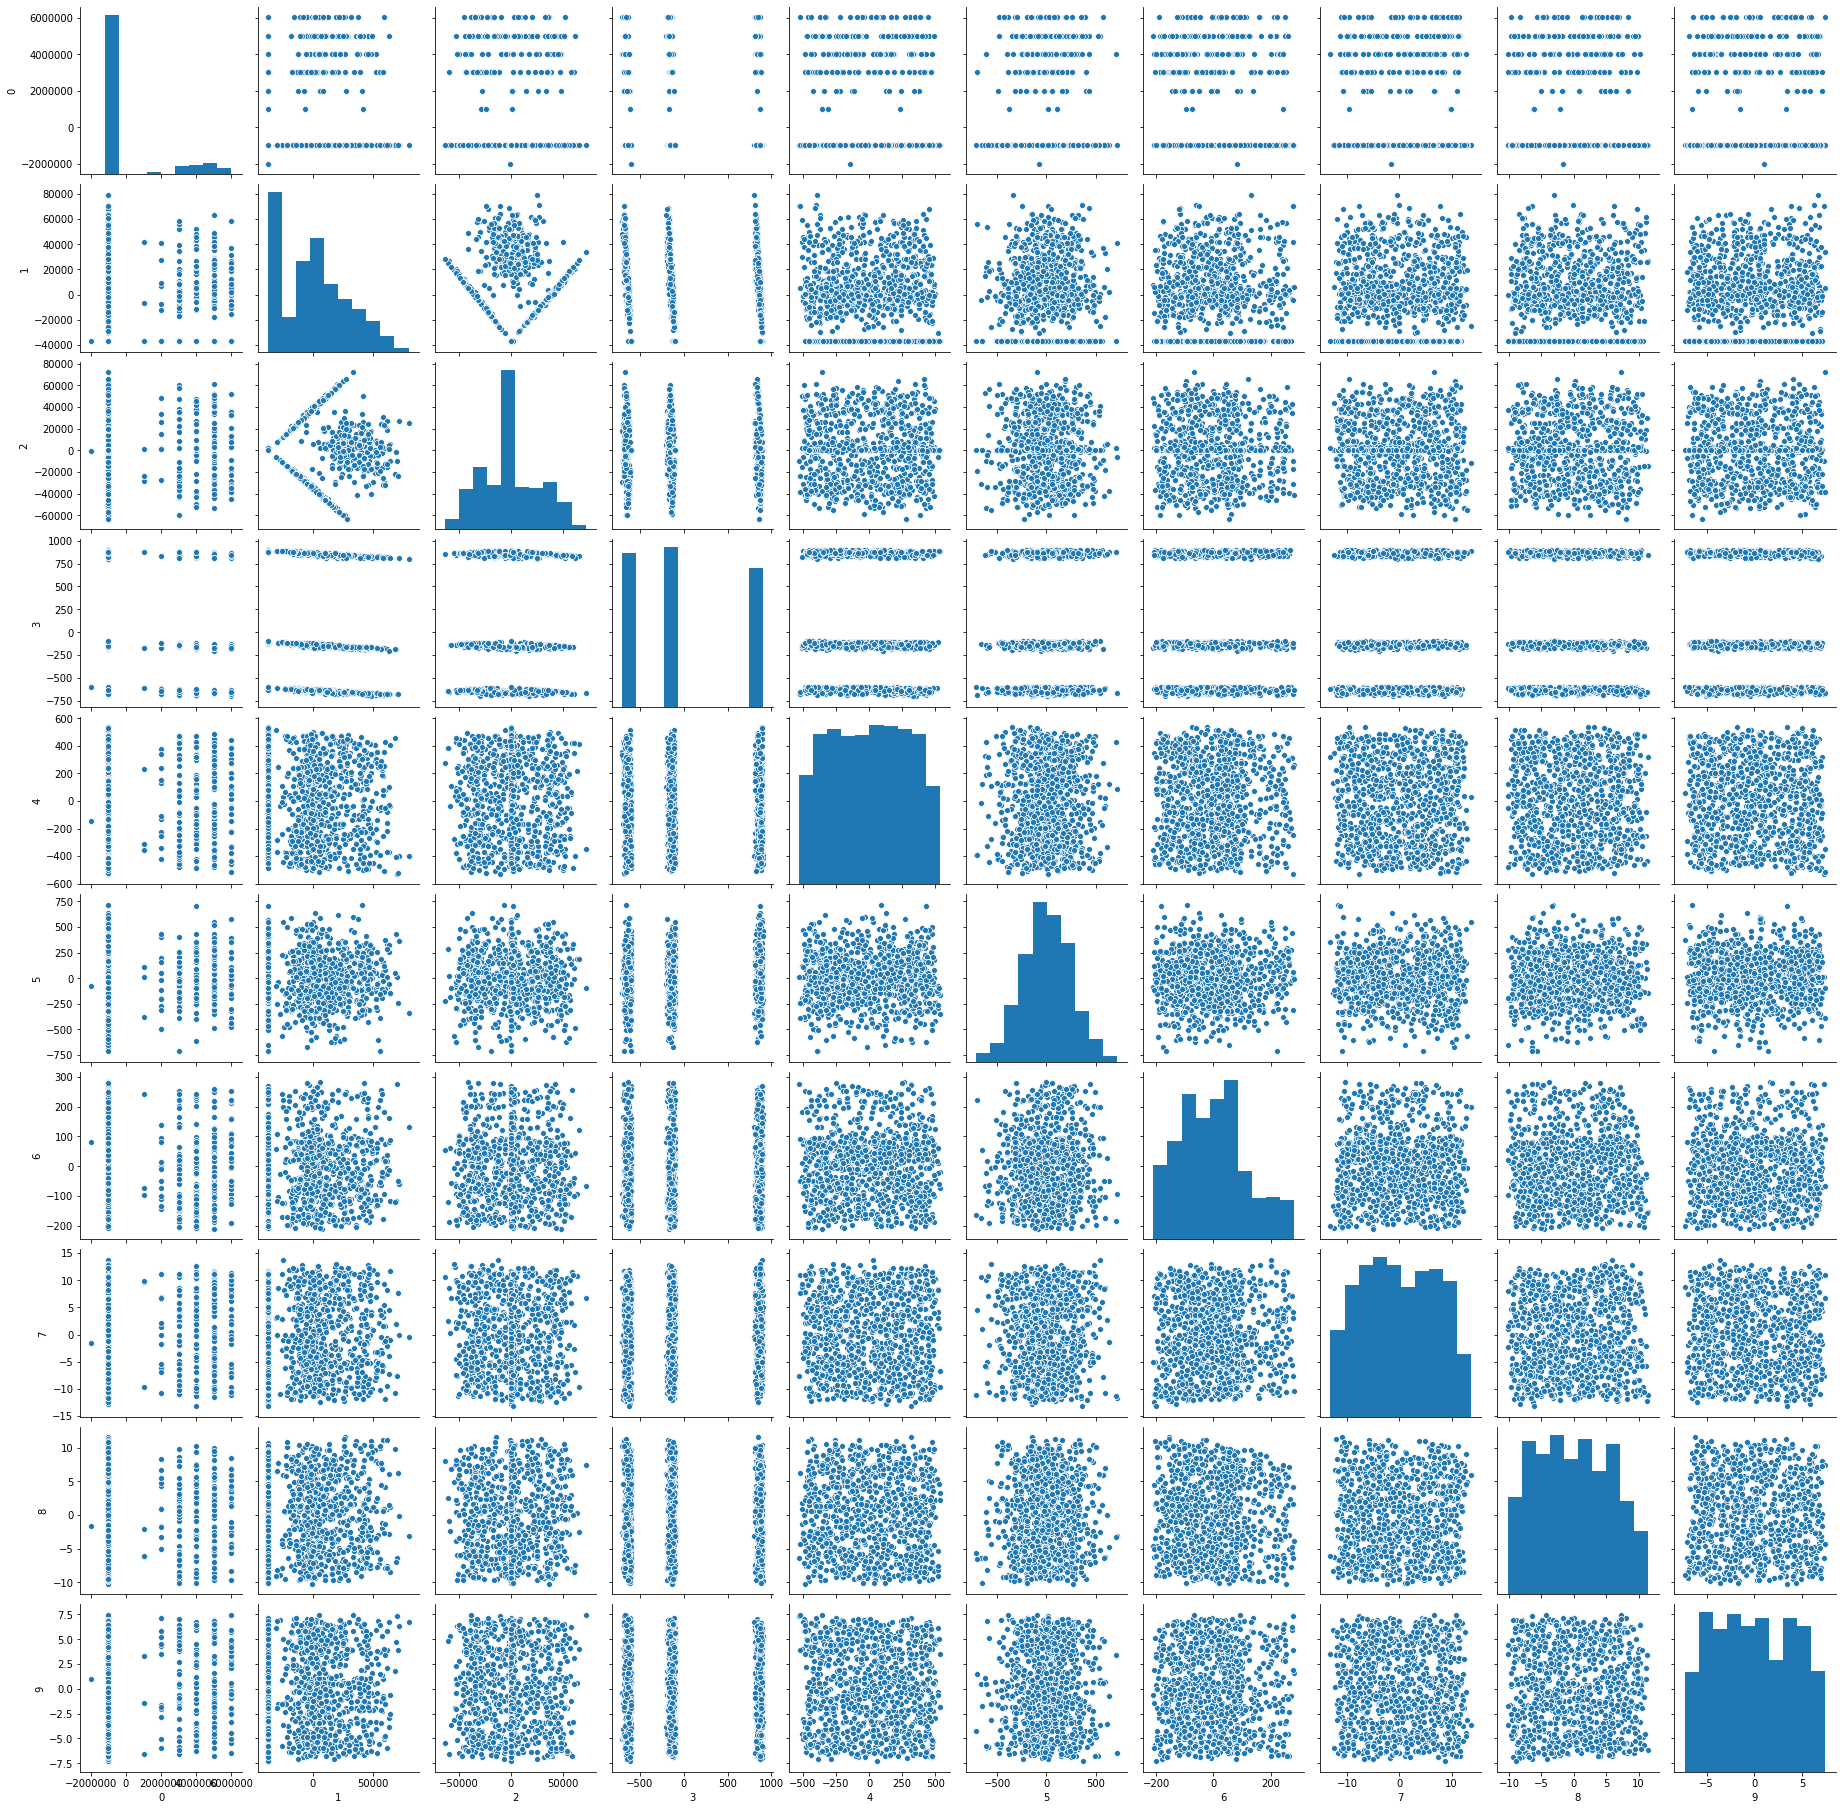

In [61]:
x=pd.DataFrame(x)
sns.pairplot(x)
#pairplot of the columns after PCA shows relation of each column to the other

In [62]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)
x=pd.DataFrame(x,columns=x.columns)

In [63]:
x.skew()
#checking skewness shows 2 colums are skewed

0    1.801424
1    0.291098
2    0.129631
3    0.473592
4   -0.004744
5   -0.033385
6    0.361332
7    0.024083
8    0.079149
9    0.057543
dtype: float64

In [64]:
#removing skewness
import warnings
warnings.filterwarnings("ignore")
import numpy as np
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

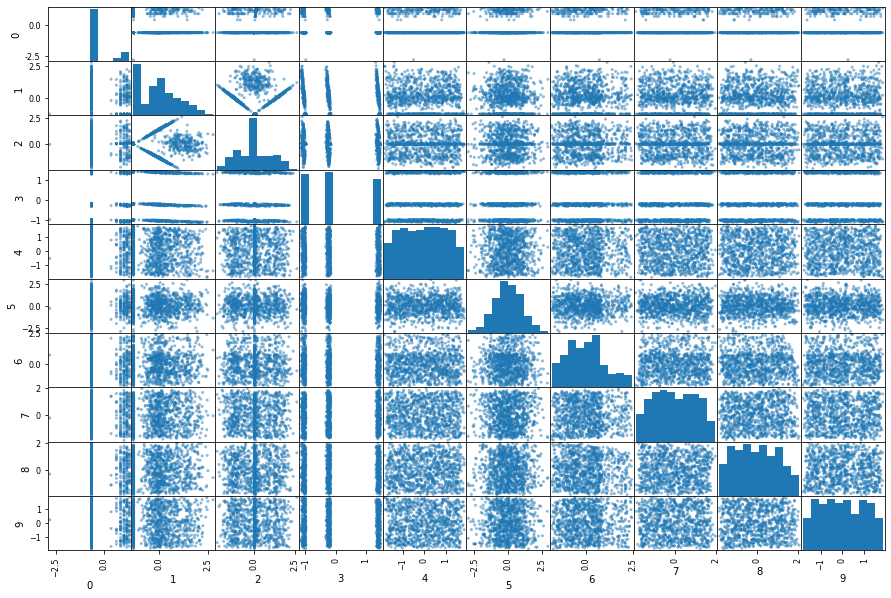

In [65]:
from pandas.plotting import scatter_matrix
scatter_matrix(x,figsize=(15,10))
plt.show()
#scatter matrix of each of the column paired with other columns

In [66]:
#dividing data into training and testing data
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2,stratify=y)

In [67]:
#importing the required algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [68]:
#creating the object
knn=KNeighborsClassifier()
sv=SVC()
dt=DecisionTreeClassifier(random_state=6)
lr=LogisticRegression()
rf=RandomForestClassifier()
gnb=GaussianNB()

In [69]:
#using GridSearchCV to find the best parameters
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import GridSearchCV
neighbors={"n_neighbors":range(1,30)}
gknn=GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 20}

In [70]:
#using GridSearchCV to find the best parameters

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
grid_param={"random_state":range(0,20),"criterion":['gini','entropy']}
Gdt=GridSearchCV(dt,param_grid=grid_param,scoring='accuracy',cv=10)
Gdt.fit(x,y)
Gdt.best_params_

{'criterion': 'entropy', 'random_state': 6}

In [71]:
#using GridSearchCV to find the best parameters

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
kernel={"kernel":["linear","rbf","poly"]}
Gsv=GridSearchCV(sv,kernel,cv=10)
Gsv.fit(x,y)
Gsv.best_params_

{'kernel': 'linear'}

In [72]:
#using GridSearchCV to find the best parameters

from sklearn.ensemble import AdaBoostClassifier
ada_class=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lr,dt]}
clf=GridSearchCV(ada_class,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'learning_rate': 0.001,
 'n_estimators': 10}

In [73]:
#using GridSearchCV to find the best parameters

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [74]:
#using GridSearchCV to find the best parameters
from sklearn.ensemble import GradientBoostingClassifier
gbr=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [75]:
#inputting the parameters to the algorithms
knn=KNeighborsClassifier(n_neighbors=20)
sv=SVC(kernel="linear")
dt=DecisionTreeClassifier(random_state=6,criterion="entropy")
lr=LogisticRegression()
rf=RandomForestClassifier(n_estimators=100)
gnb=GaussianNB()
ada_class=AdaBoostClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 learning_rate= 0.001,
 n_estimators=10)
gbr=GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)

In [76]:
models=[]
models.append(("GaussianNB",gnb))
models.append(("KNeighborsClassifier",knn))
models.append(("SVC",sv))
models.append(("DecisionTreeClassifier",dt))
models.append(("LogisticRegression",lr))
models.append(("RandomForestClassifier",rf))
models.append(("ADABoostClassifier",ada_class))
models.append(("GradientBoostingClassifier",gbr))

In [77]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

********************* GaussianNB ***************************


GaussianNB(priors=None, var_smoothing=1e-09)


accuracy_score 0.7551020408163265


cross_val_score= 0.7530612244897958
roc_auc_score= 0.5


classification_report
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       148
           1       0.00      0.00      0.00        48

    accuracy                           0.76       196
   macro avg       0.38      0.50      0.43       196
weighted avg       0.57      0.76      0.65       196



[[148   0]
 [ 48   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* KNeighborsClassifier ***************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')


accuracy_score 0.7551020408163265


cross_val_score= 0.7551020408163265
roc_auc_score= 0.5


classification_rep

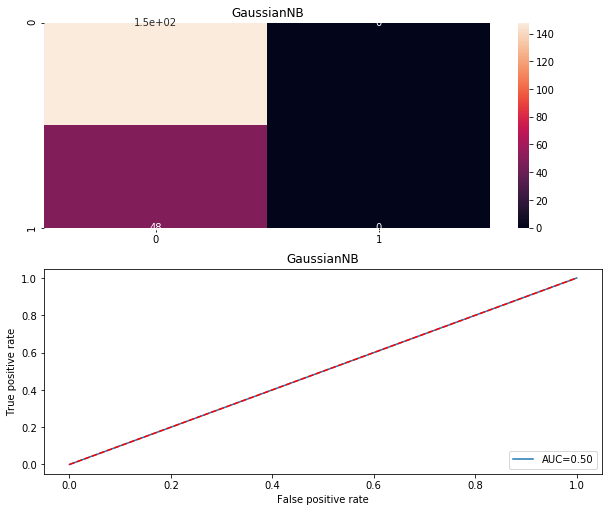

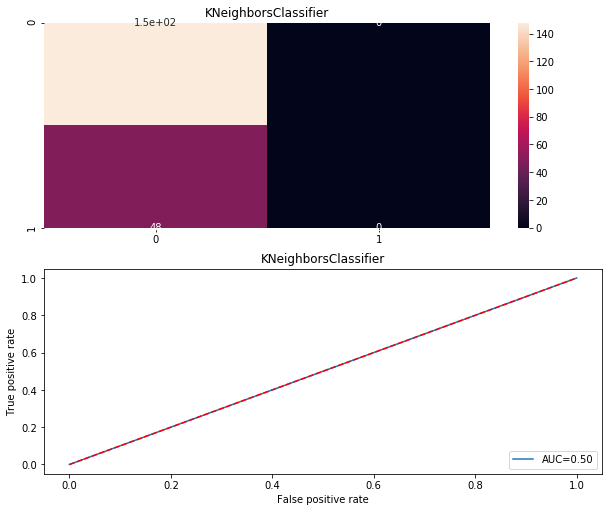

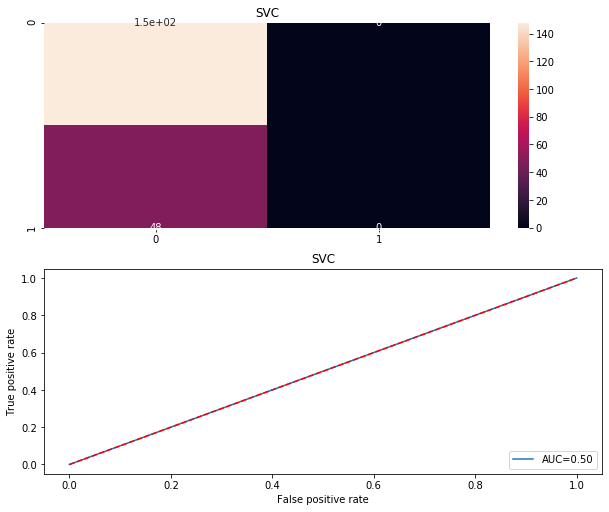

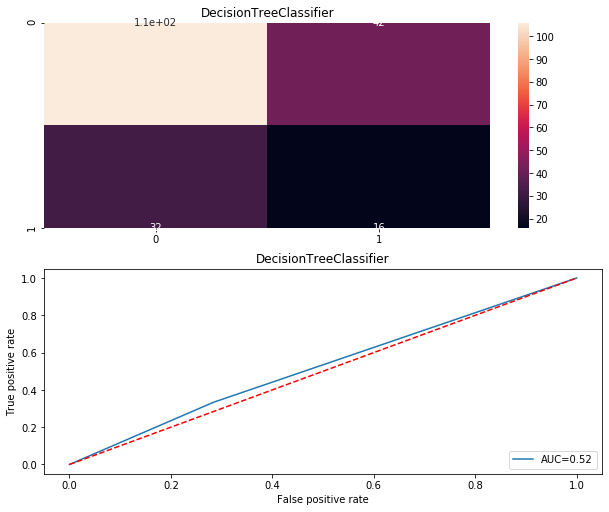

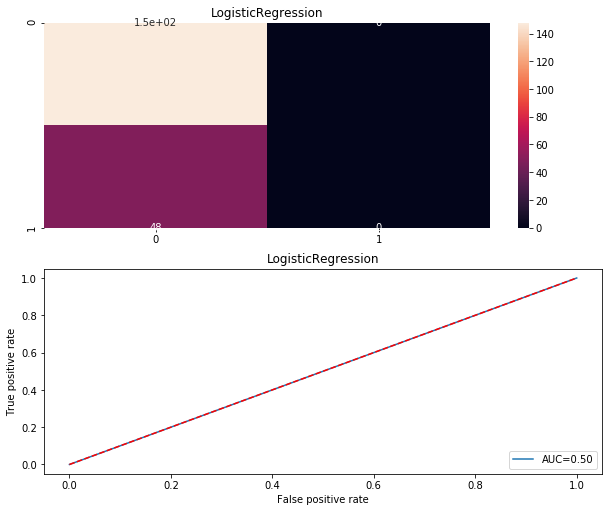

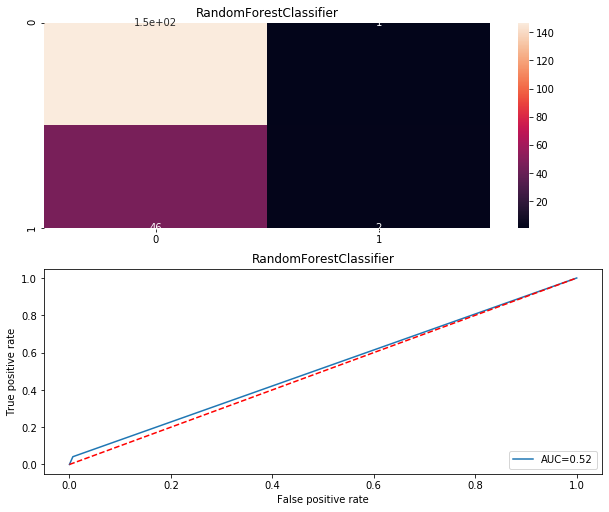

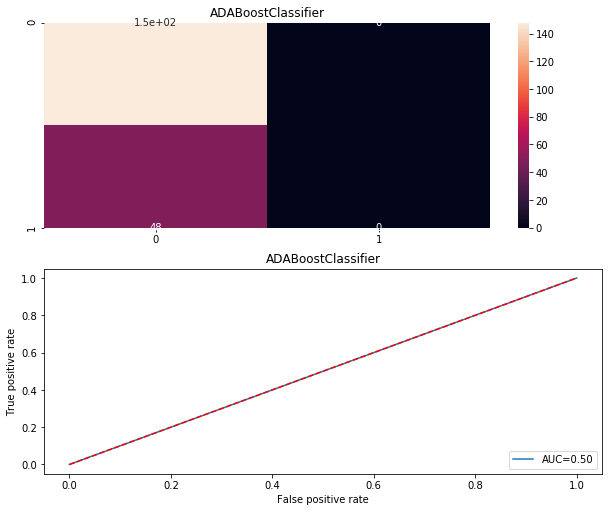

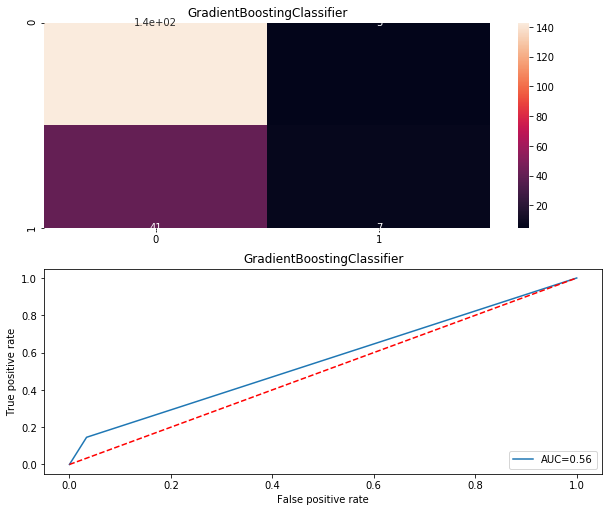

In [78]:
Model=[]
score=[]
cvs=[]
roc_score=[]
for name,model in models:
    print('*********************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print("accuracy_score",AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring="accuracy").mean()
    print("cross_val_score=",sc)
    cvs.append(sc*100)
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score=",roc_auc)
    roc_score.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print("\n")
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    print('\n\n')

In [79]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_Val_Score':cvs,'roc_auc_curve':roc_score})
result

Model  Accuracy_score  Cross_Val_Score  roc_auc_curve
0                  GaussianNB       75.510204        75.306122      50.000000
1        KNeighborsClassifier       75.510204        75.510204      50.000000
2                         SVC       75.510204        75.510204      50.000000
3      DecisionTreeClassifier       62.244898        67.755102      52.477477
4          LogisticRegression       75.510204        75.510204      50.000000
5      RandomForestClassifier       76.020408        75.918367      51.745495
6          ADABoostClassifier       75.510204        75.510204      50.000000
7  GradientBoostingClassifier       76.530612        75.306122      55.602477

In [80]:
from sklearn.externals import joblib
joblib.dump(gbr,"model_parkinsons_data.pkl")

['model_parkinsons_data.pkl']

# # since GradientBoostingClassifier is providing an accuracy of 76.53 % and cross val score of 75.30 and roc_auc score of 55.60 therefore it is selected for the model and since it takes care of the overfitting and underfitting problem